<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/YELP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'YELP'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.060001,43.470001,42.060001,43.240002,43.240002,1355300
1,2018-01-03,43.349998,43.590000,42.860001,43.119999,43.119999,1347700
2,2018-01-04,43.360001,43.529999,42.520000,42.820000,42.820000,933000
3,2018-01-05,42.950001,43.340000,42.740002,43.169998,43.169998,916700
4,2018-01-08,43.029999,43.889999,42.720001,43.669998,43.669998,807600


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [6]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,35.014270,35.651102,34.388798,35.011122,35.011122,1.390120e+06
std,7.331575,7.361717,7.310838,7.329186,7.329186,1.657682e+06
min,14.490000,16.870001,12.890000,14.460000,14.460000,1.798000e+05
25%,32.125000,32.860001,31.665000,32.220001,32.220001,7.081000e+05
50%,35.750000,36.279999,35.209999,35.709999,35.709999,1.052500e+06
75%,39.745001,40.414999,39.179998,39.735001,39.735001,1.556400e+06
max,51.950001,52.500000,49.750000,52.070000,52.070000,2.630220e+07


In [7]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

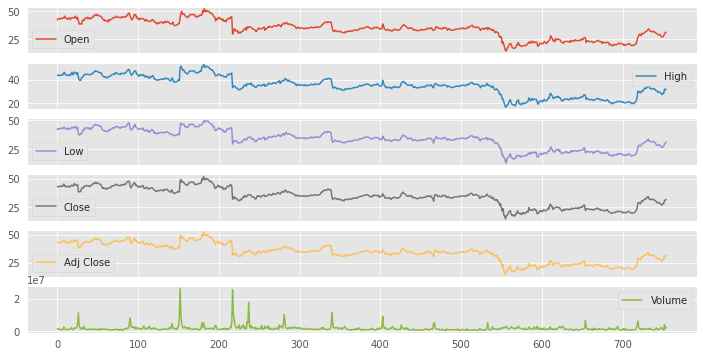

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


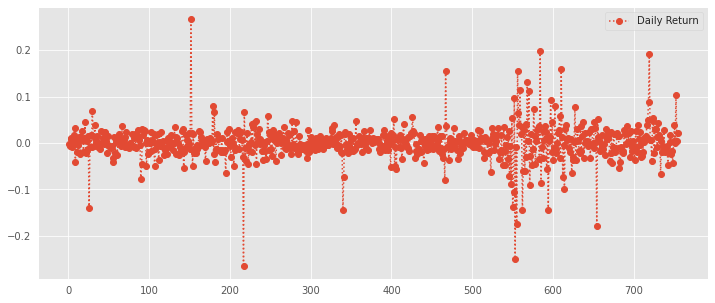

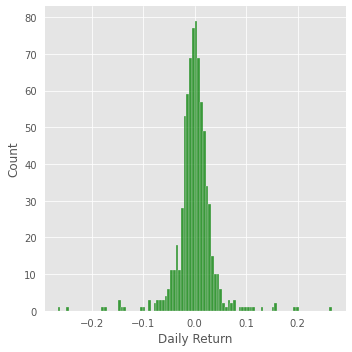

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           Date       Open       High        Low      Close  Adj Close  \
0    2018-01-02  42.060001  43.470001  42.060001  43.240002  43.240002   
1    2018-01-03  43.349998  43.590000  42.860001  43.119999  43.119999   
2    2018-01-04  43.360001  43.529999  42.520000  42.820000  42.820000   
3    2018-01-05  42.950001  43.340000  42.740002  43.169998  43.169998   
4    2018-01-08  43.029999  43.889999  42.720001  43.669998  43.669998   
..          ...        ...        ...        ...        ...        ...   
750  2020-12-23  27.139999  28.549999  26.870001  27.990000  27.990000   
751  2020-12-24  28.190001  28.299999  27.580000  28.010000  28.010000   
752  2020-12-28  29.389999  31.959999  29.299999  30.879999  30.879999   
753  2020-12-29  30.850000  31.150000  30.100000  31.000000  31.000000   
754  2020-12-30  31.200001  31.799999  31.170000  31.639999  31.639999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0    1355300       34.028847     

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

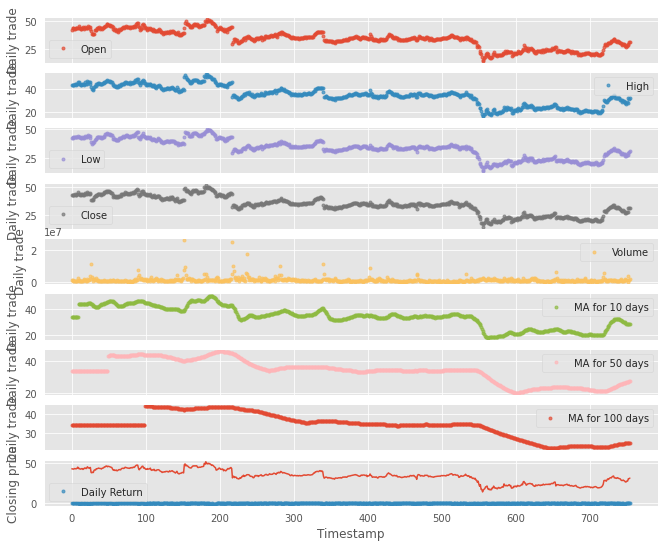

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

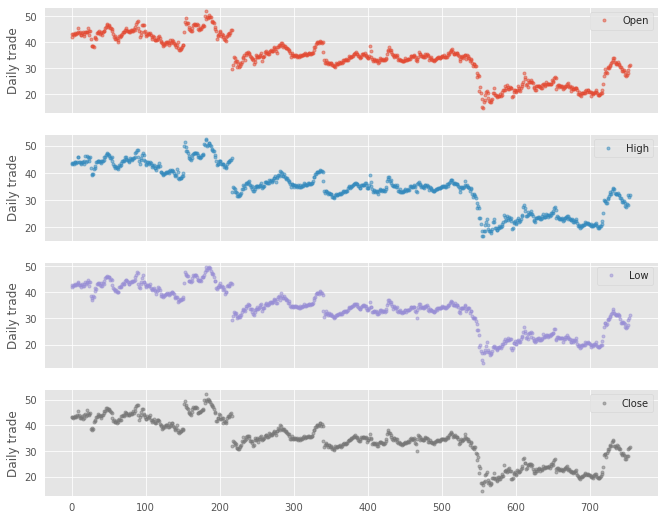

In [9]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date       Open       High        Low      Close  Adj Close  \
0    2018-01-02  42.060001  43.470001  42.060001  43.240002  43.240002   
1    2018-01-03  43.349998  43.590000  42.860001  43.119999  43.119999   
2    2018-01-04  43.360001  43.529999  42.520000  42.820000  42.820000   
3    2018-01-05  42.950001  43.340000  42.740002  43.169998  43.169998   
4    2018-01-08  43.029999  43.889999  42.720001  43.669998  43.669998   
..          ...        ...        ...        ...        ...        ...   
750  2020-12-23  27.139999  28.549999  26.870001  27.990000  27.990000   
751  2020-12-24  28.190001  28.299999  27.580000  28.010000  28.010000   
752  2020-12-28  29.389999  31.959999  29.299999  30.879999  30.879999   
753  2020-12-29  30.850000  31.150000  30.100000  31.000000  31.000000   
754  2020-12-30  31.200001  31.799999  31.170000  31.639999  31.639999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0    1355300       34.028847     

,count,mean,std,min,25%,50%,75%,max
Open,755.0,3.405563e+01,8.116189e+00,14.490000,29.960000,3.456000e+01,4.021000e+01,5.195000e+01
High,755.0,3.466947e+01,8.148751e+00,16.870001,30.745000,3.507000e+01,4.078500e+01,5.250000e+01
Low,755.0,3.345375e+01,8.106107e+00,12.890000,29.315000,3.417000e+01,3.959500e+01,4.975000e+01
Close,755.0,3.405728e+01,8.123754e+00,14.460000,30.040000,3.462000e+01,4.018500e+01,5.207000e+01
Adj Close,755.0,3.405728e+01,8.123754e+00,14.460000,30.040000,3.462000e+01,4.018500e+01,5.207000e+01
Volume,755.0,1.590649e+06,1.846083e+06,179800.000000,871800.000000,1.205200e+06,1.730700e+06,2.630220e+07
MA for 10 days,755.0,3.402885e+01,7.958866e+00,18.467000,30.173500,3.467900e+01,4.001900e+01,4.974100e+01
MA for 50 days,755.0,3.389658e+01,7.371247e+00,20.007200,28.583600,3.431780e+01,3.912320e+01,4.646880e+01
MA for 100 days,755.0,3.392045e+01,6.565106e+00,21.797500,31.604250,3.423030e+01,3.757295e+01,4.381860e+01
Daily Return,755.0,2.875500e-04,3.711073e-02,-0.265977,-0.013392,7.145573e-04,1.526400e-02,2.665095e-01


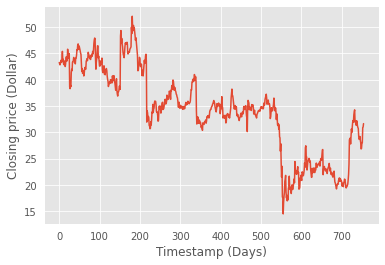

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = data
print(df)

df.describe().transpose()

In [11]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 11s 182ms/step - loss: 0.0291 - mse: 0.0291 - mae: 0.1276 - val_loss: 0.0230 - val_mse: 0.0230 - val_mae: 0.1107
Epoch 2/40
14/14 [==============================] - 1s 39ms/step - loss: 0.0205 - mse: 0.0205 - mae: 0.1022 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0865
Epoch 3/40
14/14 [==============================] - 1s 36ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0908 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0785
Epoch 4/40
14/14 [==============================] - 0s 35ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0821 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0811
Epoch 5/40
14/14 [==============================] - 1s 36ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0764 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0641
Epoch 6/40
14/14 [==============================] - 0s 35ms/step - loss: 0.0103 - mse: 0.0103 - mae: 0.0730 - val_loss: 0.0087 - val_mse: 0.0087 - val_mae: 0.0660
Epoch 7/40
14/14 [==

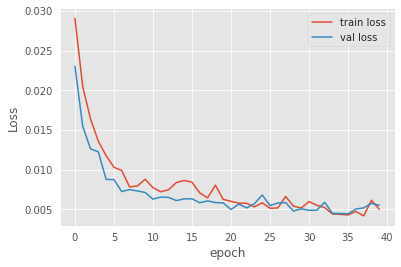

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

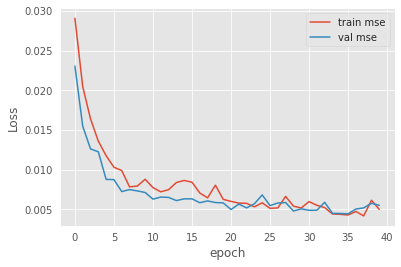

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

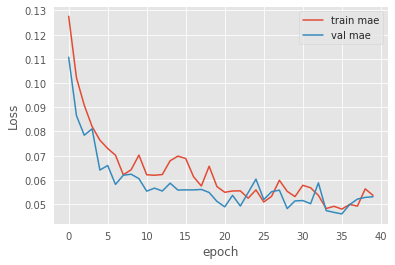

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [16]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 9ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0530


[0.0054777334444224834, 0.0054777334444224834, 0.05304349586367607]

In [17]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.834909
R2 Score: 0.834909
Max Error: 0.396607


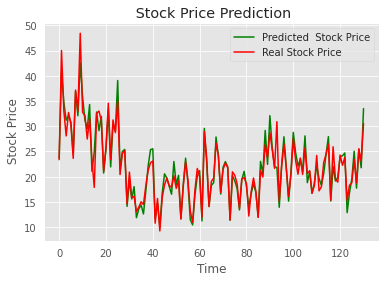

In [18]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [19]:
# First we need to save a model
model.save("model.h5")

In [20]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [21]:
df2 = raw_data[655:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
248


In [22]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.0972


[0.022087352350354195, 0.022087352350354195, 0.09715408831834793]

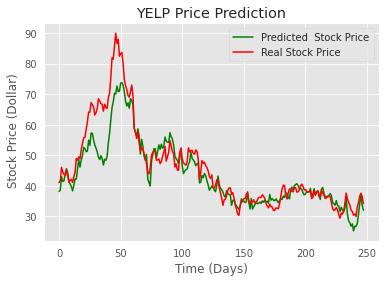

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()